Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

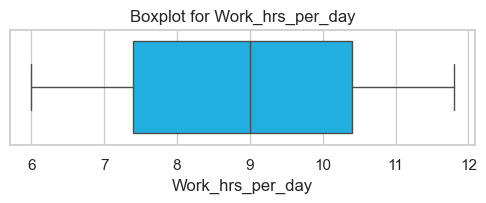

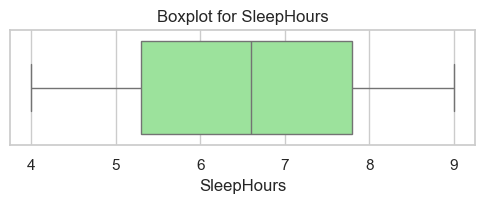

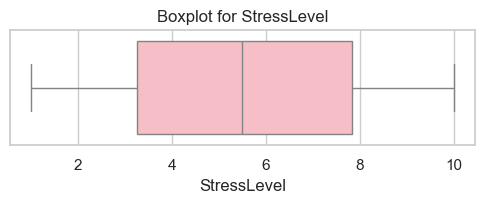

IQR Method → 0 outliers removed from 'Work_hrs_per_day'
IQR Method → 0 outliers removed from 'SleepHours'
IQR Method → 0 outliers removed from 'StressLevel'


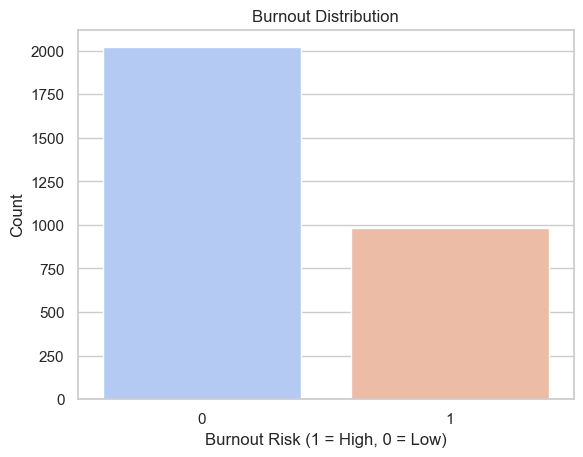

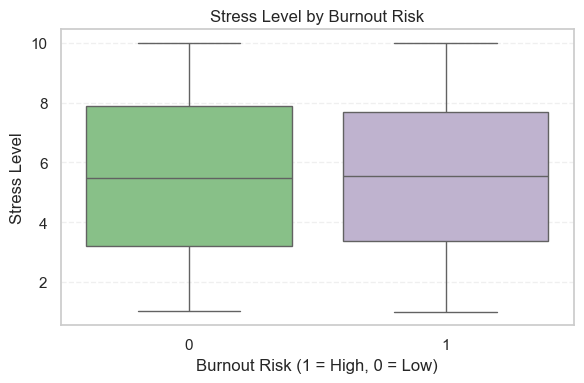

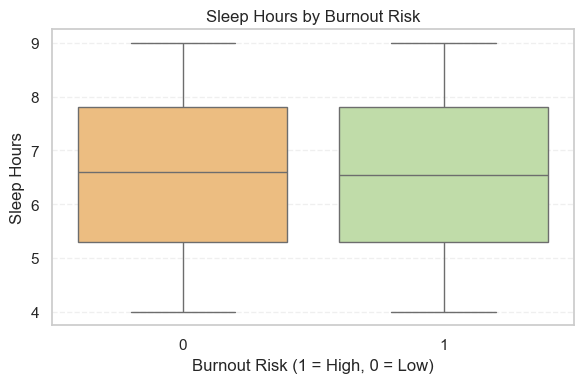

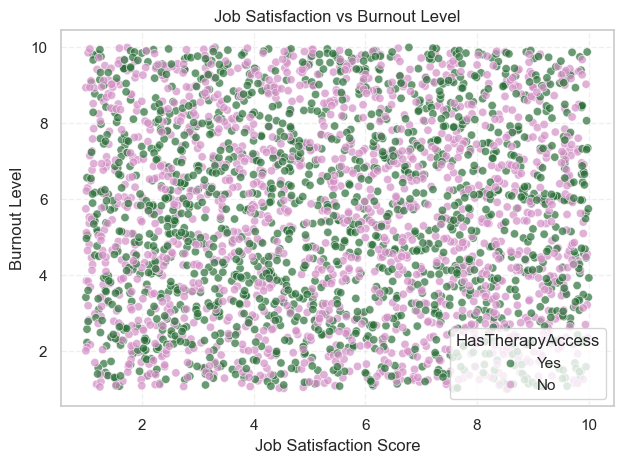

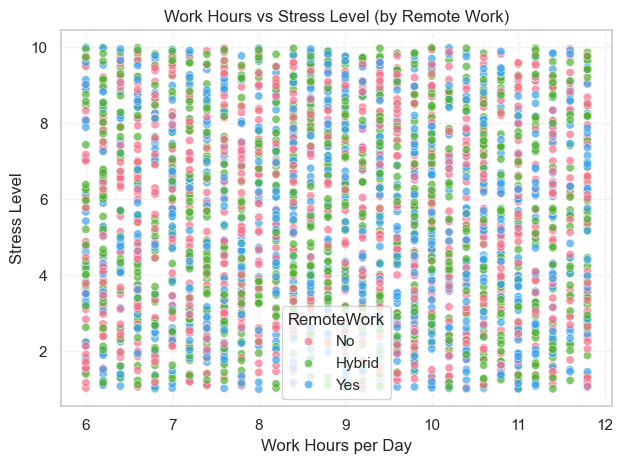

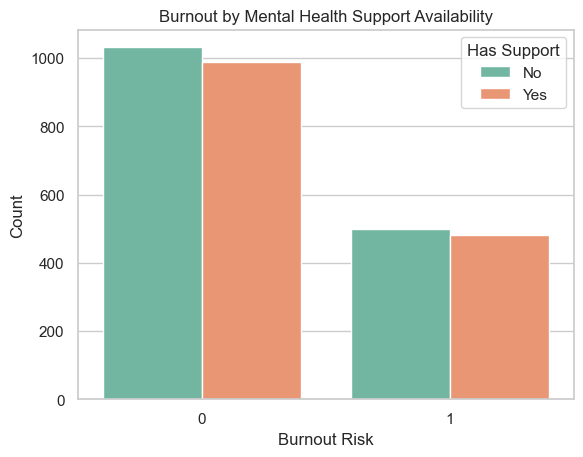

✅ Cleaned dataset saved successfully.


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load Dataset
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/mental_health_workplace_survey.csv")

# Basic info
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
df.info()
df.describe()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

# Handling Missing Values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_val}")

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

# Derived column
df['Work_hrs_per_day'] = df['WorkHoursPerWeek'] / 5

# Boxplots with vibrant colors
features = ['Work_hrs_per_day', 'SleepHours', 'StressLevel']
colors = ['#00BFFF', '#90EE90', '#FFB6C1']  # Custom colors
for i, col in enumerate(features):
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col, color=colors[i])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Outlier removal
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_count = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_count - df.shape[0]
    print(f"IQR Method → {removed} outliers removed from '{col}'")
    return df

for col in ['Work_hrs_per_day', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)

# Burnout distribution - cool palette
sns.countplot(x='BurnoutRisk', data=df, palette='coolwarm')
plt.title("Burnout Distribution")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Count")
plt.show()

# Stress Level by Burnout Risk - Accent palette
plt.figure(figsize=(6, 4))
sns.boxplot(x='BurnoutRisk', y='StressLevel', data=df, palette='Accent')
plt.title("Stress Level by Burnout Risk")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Stress Level")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Sleep Hours by Burnout Risk - Spectral palette
plt.figure(figsize=(6, 4))
sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df, palette='Spectral')
plt.title("Sleep Hours by Burnout Risk")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Sleep Hours")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Job Satisfaction vs Burnout Level - cubehelix palette
sns.scatterplot(data=df, x='JobSatisfaction', y='BurnoutLevel',
                hue='HasTherapyAccess', palette='cubehelix', alpha=0.7)
plt.title("Job Satisfaction vs Burnout Level")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Burnout Level")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Work Hours vs Stress Level - husl palette
sns.scatterplot(data=df, x='Work_hrs_per_day', y='StressLevel', hue='RemoteWork',
                palette='husl', alpha=0.7)
plt.title("Work Hours vs Stress Level (by Remote Work)")
plt.xlabel("Work Hours per Day")
plt.ylabel("Stress Level")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Burnout by Mental Health Support - Set2 palette
sns.countplot(x='BurnoutRisk', hue='HasMentalHealthSupport', data=df, palette='Set2')
plt.title("Burnout by Mental Health Support Availability")
plt.xlabel("Burnout Risk")
plt.ylabel("Count")
plt.legend(title="Has Support")
plt.show()

# Save Cleaned Data
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("✅ Cleaned dataset saved successfully.")
